In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings("ignore")

C:\Users\yelam\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [5]:
df['booking_status'].describe()

count    42100.000000
mean         0.392019
std          0.488207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: booking_status, dtype: float64

In [6]:
df.head(5)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


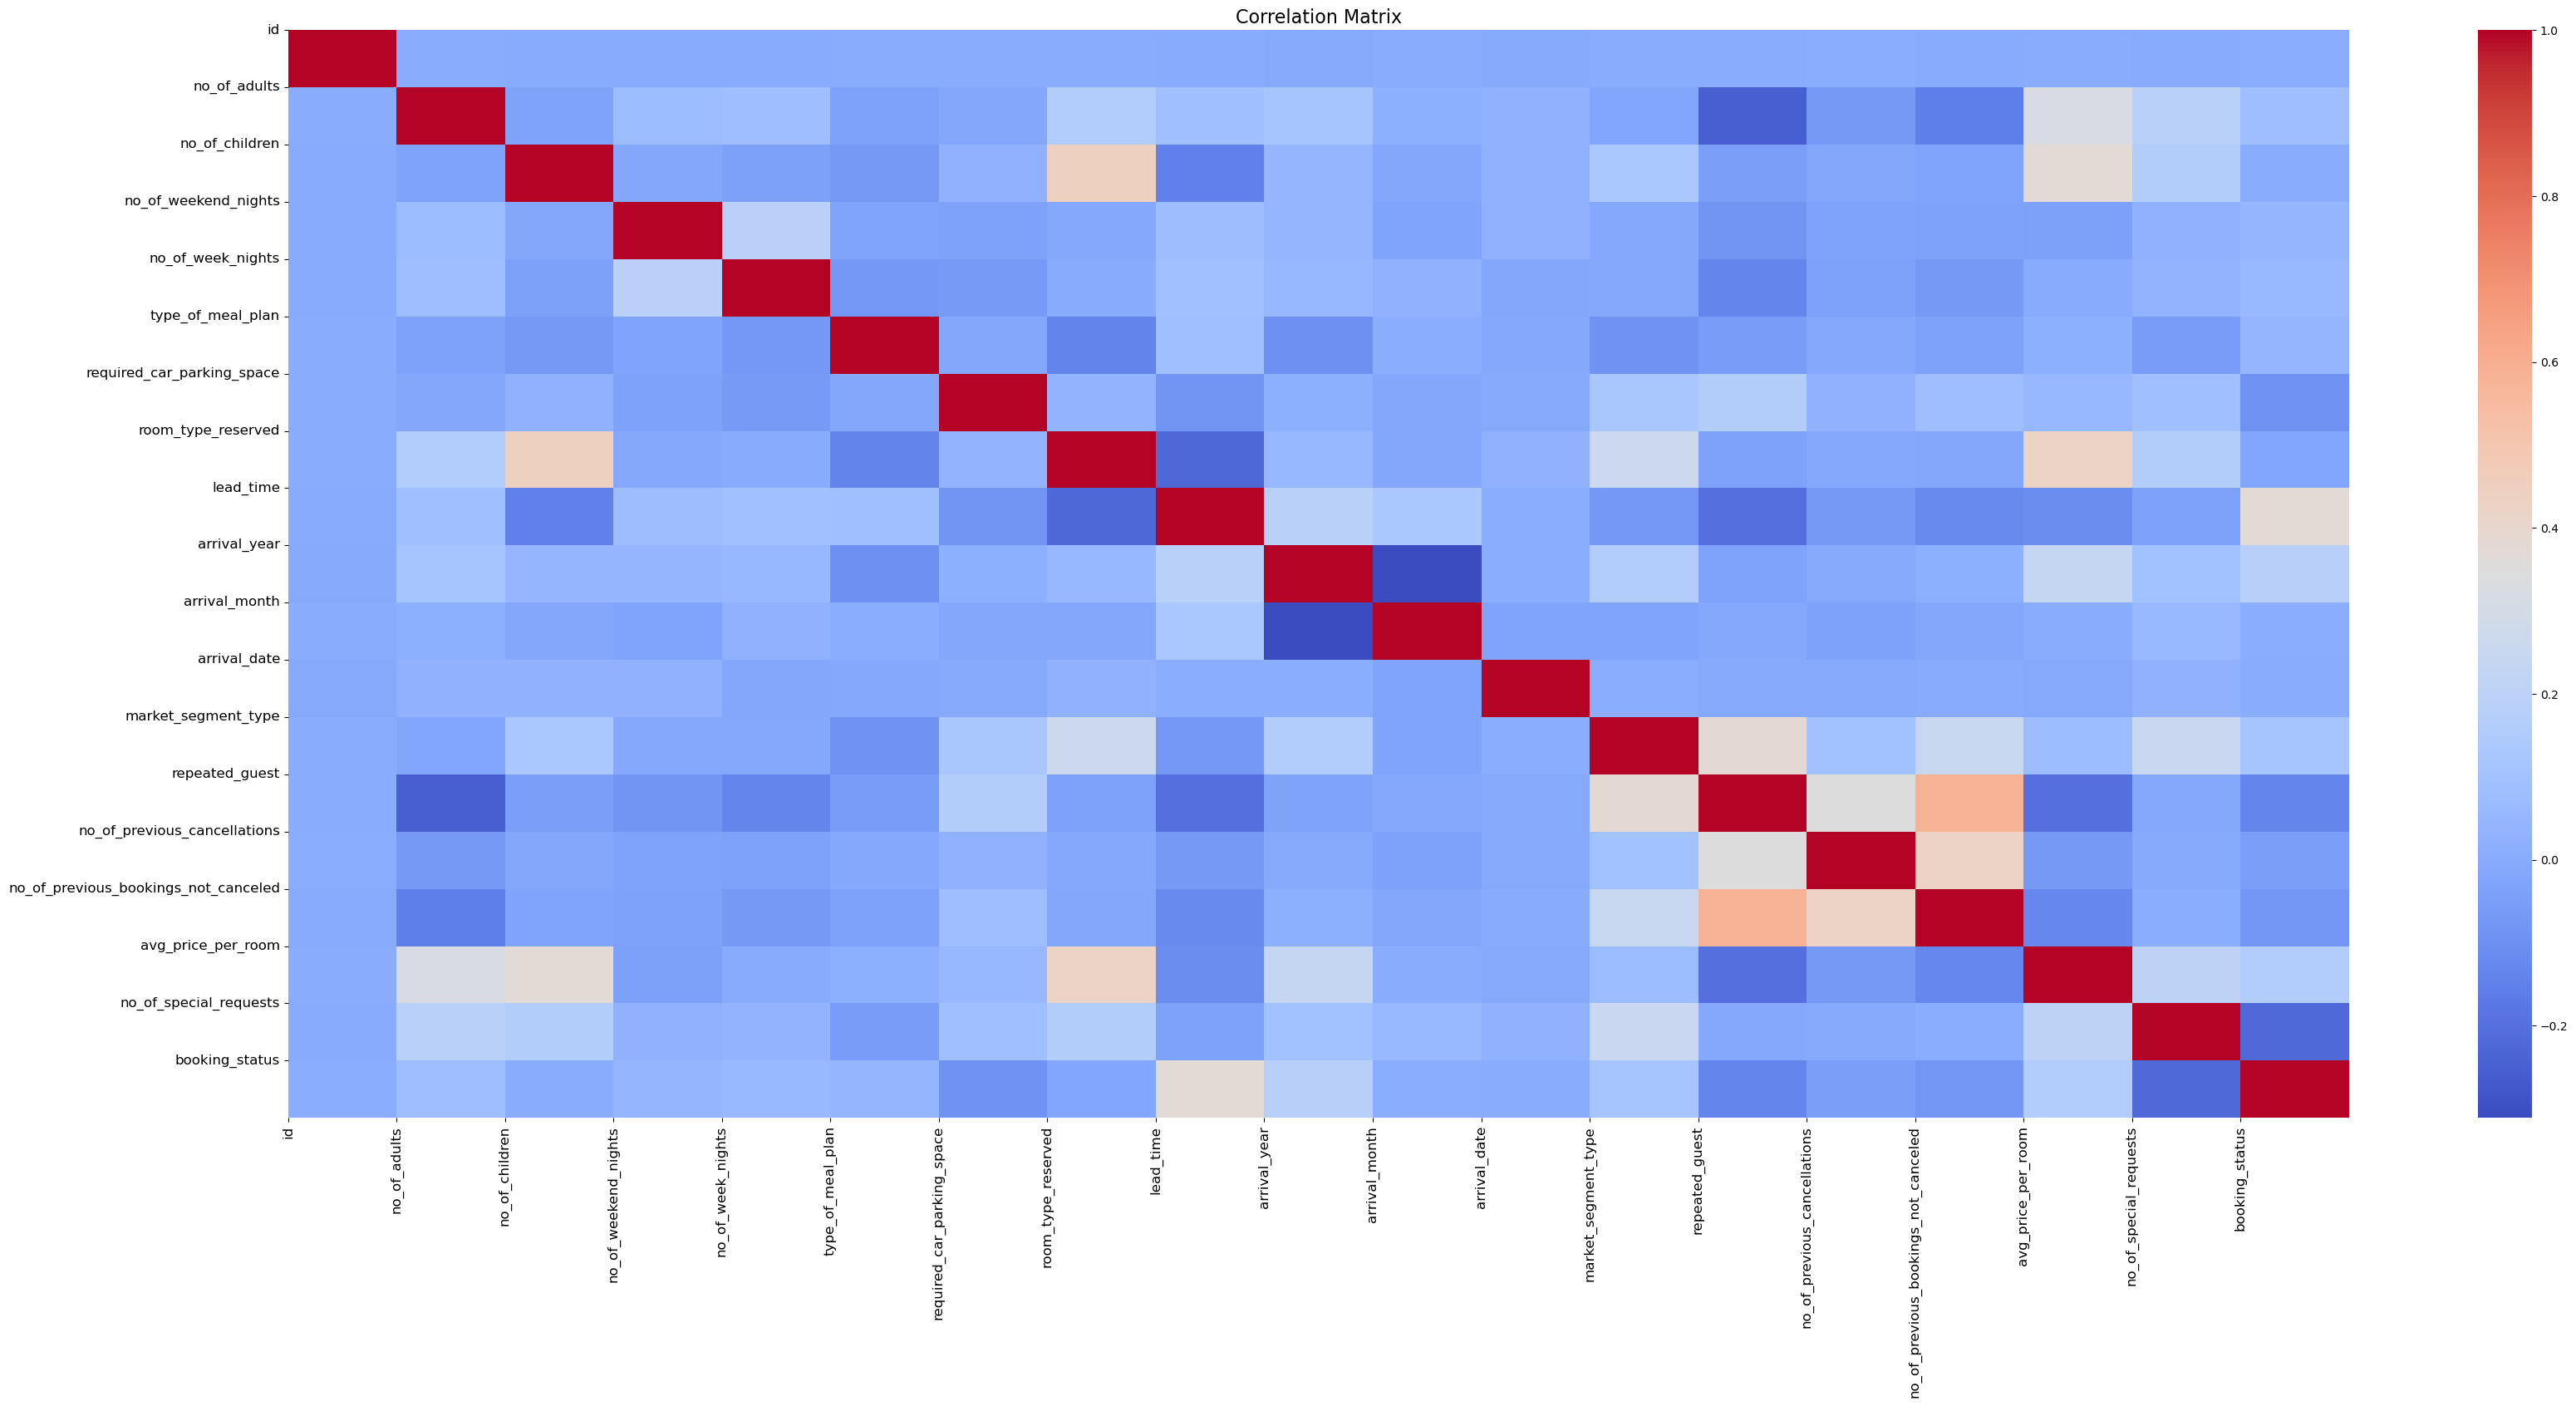

In [7]:
plt.figure(figsize=(40,17))

corr = df.corr()  # Call the corr() method on the DataFrame to get the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')

plt.xticks(range(len(corr.columns)), corr.columns, fontsize=12)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=12)

plt.title('Correlation Matrix', fontsize=16)

plt.show()

In [8]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

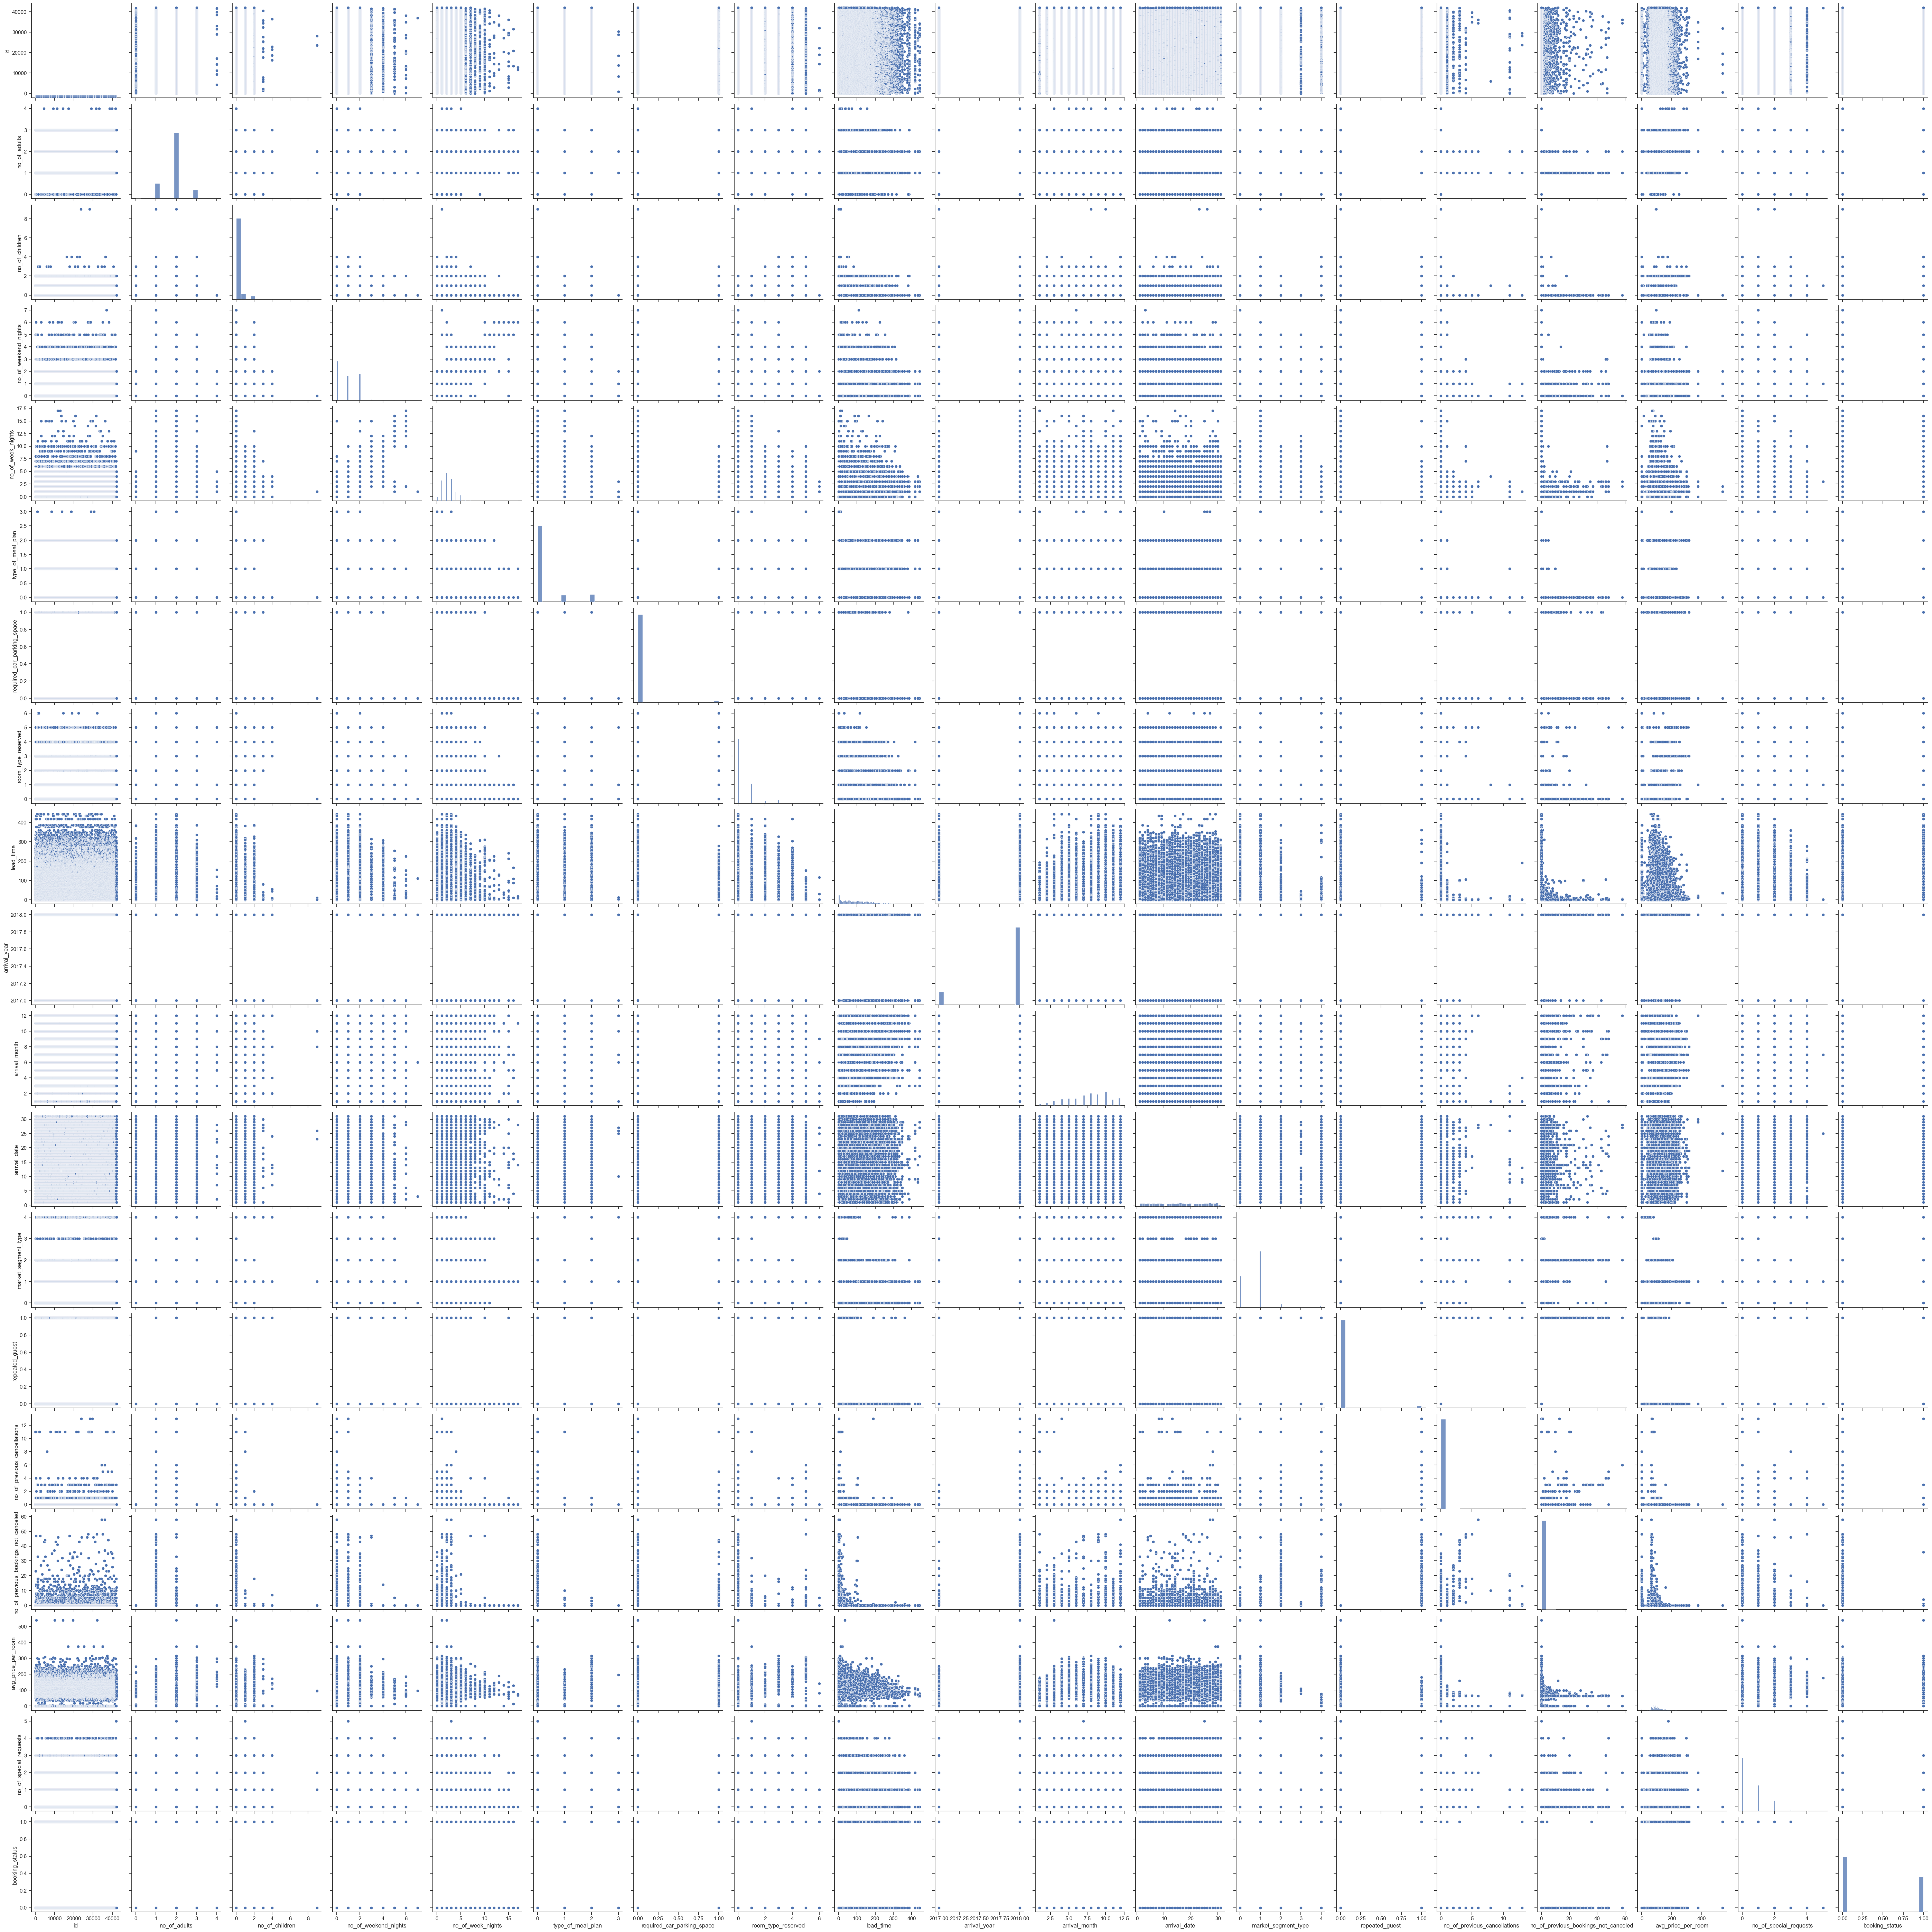

In [9]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, height=3)

In [10]:
for column in df.columns:

    duplicates = df[column].duplicated(keep='last')
    duplicates_count = duplicates.sum()
    
    print(f"Column {column}: {duplicates_count} duplicates")

Column id: 0 duplicates
Column no_of_adults: 42095 duplicates
Column no_of_children: 42094 duplicates
Column no_of_weekend_nights: 42092 duplicates
Column no_of_week_nights: 42082 duplicates
Column type_of_meal_plan: 42096 duplicates
Column required_car_parking_space: 42098 duplicates
Column room_type_reserved: 42093 duplicates
Column lead_time: 41762 duplicates
Column arrival_year: 42098 duplicates
Column arrival_month: 42088 duplicates
Column arrival_date: 42069 duplicates
Column market_segment_type: 42095 duplicates
Column repeated_guest: 42098 duplicates
Column no_of_previous_cancellations: 42090 duplicates
Column no_of_previous_bookings_not_canceled: 42058 duplicates
Column avg_price_per_room: 39814 duplicates
Column no_of_special_requests: 42094 duplicates
Column booking_status: 42098 duplicates


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

0.8330419524360916


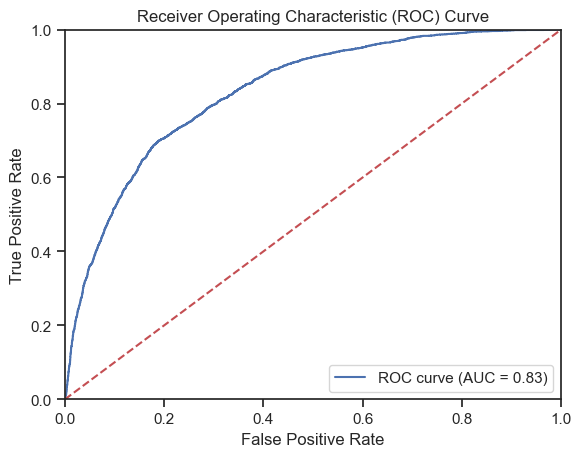

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

Evaluation Metrics:
ROC AUC Score: 0.8330
RMSE: 0.4812
MSE: 0.2316
R-squared Score: 0.0250
Accuracy: 0.7684
F1 Score: 0.6917


0.730859831952733


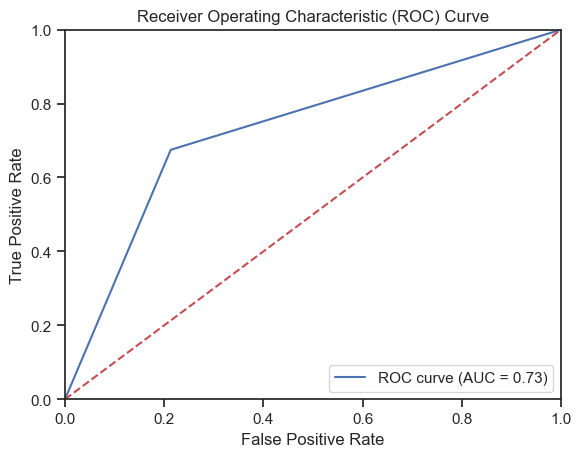

Evaluation Metrics:
ROC AUC Score: 0.7309
RMSE: 0.5066
MSE: 0.2567
R-squared Score: -0.0805
Accuracy: 0.7433
F1 Score: 0.6713


In [14]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.8867399424007602


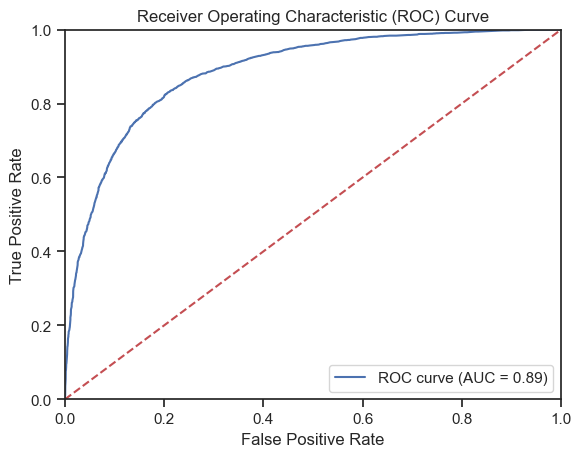

Evaluation Metrics:
ROC AUC Score: 0.8867
RMSE: 0.4292
MSE: 0.1842
R-squared Score: 0.2245
Accuracy: 0.8158
F1 Score: 0.7549


In [15]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.7978948962322971


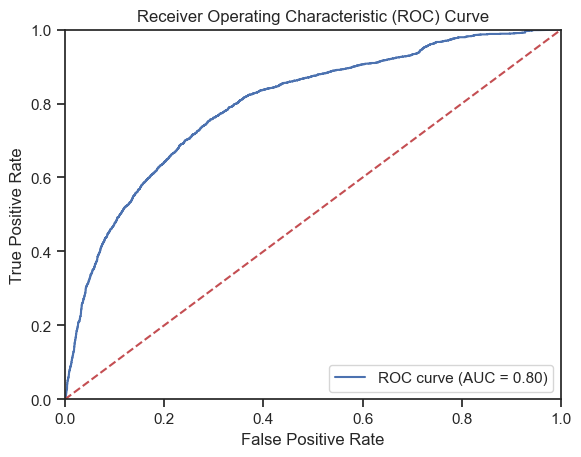

Evaluation Metrics:
ROC AUC Score: 0.7979
RMSE: 0.7426
MSE: 0.5514
R-squared Score: -1.3214
Accuracy: 0.4486
F1 Score: 0.5821


In [16]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.831687717110537


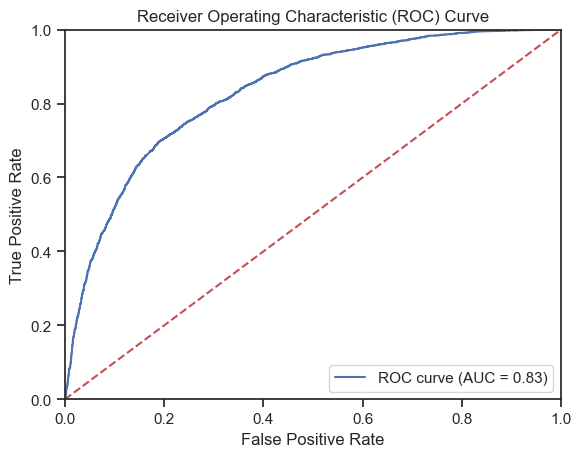

Evaluation Metrics:
ROC AUC Score: 0.8317
RMSE: 0.4842
MSE: 0.2344
R-squared Score: 0.0130
Accuracy: 0.7656
F1 Score: 0.6911


In [17]:
model = svm.SVC(kernel='linear', C=3, probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.751354769751492


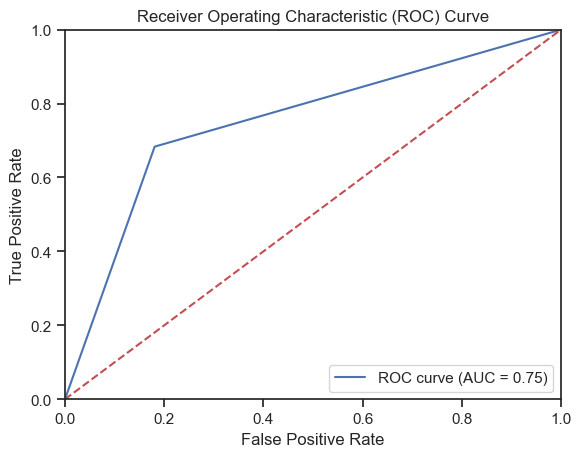

Evaluation Metrics:
ROC AUC Score: 0.7514
RMSE: 0.4832
MSE: 0.2335
R-squared Score: 0.0170
Accuracy: 0.7665
F1 Score: 0.6945


In [18]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Cross-validation accuracy: 0.7929216152019002


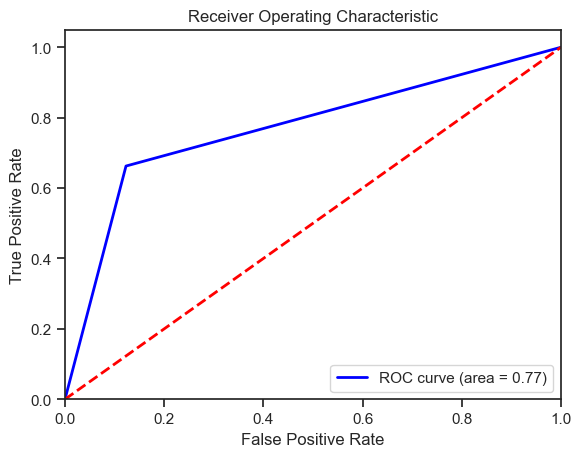

In [20]:
k = 10
rfc = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=42)
cv = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

y_true = []
y_pred = []


for train_idx, test_idx in cv.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

    rfc.fit(X_train, y_train)
    y_pred_fold = rfc.predict(X_valid)

    y_true.extend(y_valid)
    y_pred.extend(y_pred_fold)

    
cv_acc = np.mean(cross_val_score(rfc, X, y, cv=cv))
print('Cross-validation accuracy:', cv_acc)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
df = pd.read_csv('train.csv')

In [22]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

Fold 1/15
Fold 2/15
Fold 3/15
Fold 4/15
Fold 5/15
Fold 6/15
Fold 7/15
Fold 8/15
Fold 9/15
Fold 10/15
Fold 11/15
Fold 12/15
Fold 13/15
Fold 14/15
Fold 15/15
Average ROC AUC: 0.898
Average Accuracy: 0.825
Average RMSE: 0.353
Average F1 score: 0.772


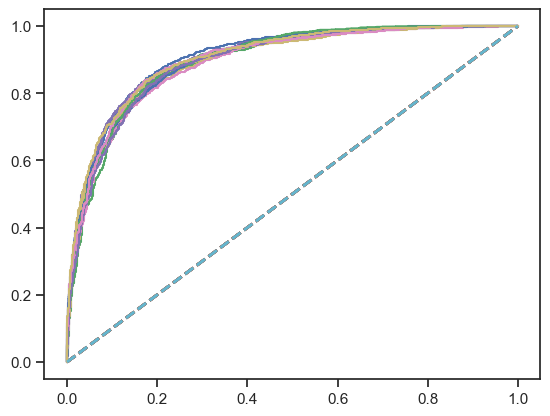

In [23]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_folds = 15
kf = KFold(n_splits=n_folds, shuffle=True)

def evaluate(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred.round())
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    f1 = f1_score(y_true, y_pred.round())
    return roc_auc, acc, rmse, f1

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "verbosity": -1,
    "num_leaves": 35,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1000,
    "seed": 42,
    "verbose_eval":100,
    "early_stopping_rounds":100,
}


roc_auc_list = []
acc_list = []
rmse_list = []
f1_list = []


for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f"Fold {fold+1}/{n_folds}")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
    )
    

    y_val_pred = model.predict(X_val)
    roc_auc, acc, rmse, f1 = evaluate(y_val, y_val_pred)
    roc_auc_list.append(roc_auc)
    acc_list.append(acc)
    rmse_list.append(rmse)
    f1_list.append(f1)
    

    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    plt.plot(fpr, tpr, label=f"Fold {fold+1}")
    plt.plot([0,1], [0,1] ,lw=2, linestyle="--")
    

print(f"Average ROC AUC: {np.mean(roc_auc_list):.3f}")
print(f"Average Accuracy: {np.mean(acc_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average F1 score: {np.mean(f1_list):.3f}")

In [24]:
test_df=pd.read_csv('test.csv')
prediction_test=model.predict(test_df)
pd.DataFrame(prediction_test).to_csv('model_submission5.csv')

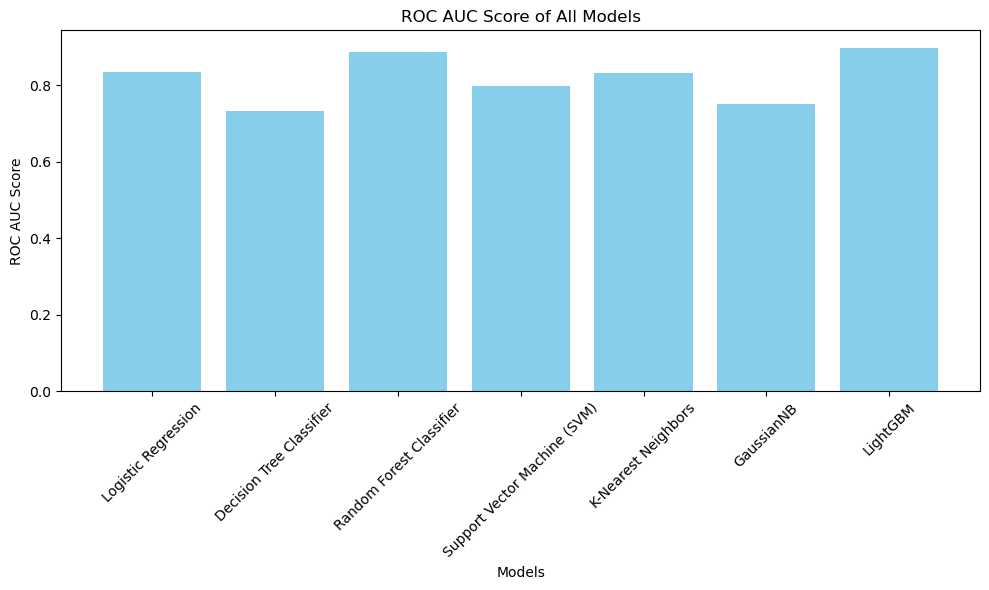

In [3]:
import matplotlib.pyplot as plt


models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machine (SVM)', 'K-Nearest Neighbors', 'GaussianNB', 'LightGBM']
roc_auc_scores = [0.8330, 0.7309, 0.8867, 0.7979, 0.8317, 0.7514, 0.8980]


plt.figure(figsize=(10, 6))
plt.bar(models, roc_auc_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score of All Models')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# You can also Use this to build the bar graph
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42),
#     "Gaussian Naive Bayes": GaussianNB(),
#     "Support Vector Machine": svm.SVC(kernel='linear', C=3, probability=True),
#     "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "LightGBM": lgb.LGBMClassifier(objective='binary', random_state=42, n_estimators=1000, num_leaves=35, learning_rate=0.05)
# }

# k = 10
# rfc = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=42)
# cv = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

# y_true = []
# y_pred = []

# for train_idx, test_idx in cv.split(X, y):
#     X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

#     rfc.fit(X_train, y_train)
#     y_pred_fold = rfc.predict(X_valid)

#     y_true.extend(y_valid)
#     y_pred.extend(y_pred_fold)

# roc_auc_rfc = roc_auc_score(y_true, y_pred)
# roc_auc_scores = {}
# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train, y_train)
#     y_pred_proba = model.predict_proba(X_valid)[:,1]
#     roc_auc = roc_auc_score(y_valid, y_pred_proba)
#     roc_auc_scores[name] = roc_auc


# roc_auc_scores["Random Forest (Stratified K-Fold)"] = roc_auc_rfc
# plt.figure(figsize=(12, 6))
# plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
# plt.xlabel('Model')
# plt.ylabel('ROC AUC Score')
# plt.title('ROC AUC Score of Different Models')
# plt.xticks(rotation=45, ha='right')
# plt.ylim(0, 1)
# plt.show()